# Honey Price Prediction🍯

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np

In [2]:
#Load dataset
df = pd.read_csv('dataset.csv')

In [3]:
df

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62
...,...,...,...,...,...,...,...,...,...,...,...
247898,1.98,1.29,17.90,4.82,0.89,36.10,34.69,Rosemary,8261.63,1.00,754.98
247899,6.18,1.67,19.54,4.91,0.85,31.15,20.82,Acacia,6939.39,1.00,543.41
247900,7.78,1.49,15.78,5.69,0.73,44.60,44.07,Chestnut,4139.79,0.64,615.46
247901,5.78,1.74,14.96,6.81,0.83,47.19,37.79,Avocado,4417.74,0.97,949.32


### *Exploratory Data Analysis (EDA)*

In [ ]:
#Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.rename(columns= {'CS': "Color Score", 'WC': "Water Content",  'EC': "Electrical Conductivity", 'F':"Fructose Level", 
                    'G': "Glucose Level", "Pollen_analysis":'Pollen Analysis'}, inplace=True)

In [4]:
df.isnull().sum()

CS                 0
Density            0
WC                 0
pH                 0
EC                 0
F                  0
G                  0
Pollen_analysis    0
Viscosity          0
Purity             0
Price              0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Color Score,Density,Water Content,pH,Electrical Conductivity,Fructose Level,Glucose Level,Viscosity,Purity,Price
count,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000
mean,5.500259,1.535523,18.502625,4.996047,0.799974,34.970573,32.501006,5752.893888,0.824471,594.807644
std,2.593947,0.187824,3.748635,1.444060,0.057911,8.655898,7.226290,2455.739903,0.139417,233.627972
min,1.000000,1.210000,12.000000,2.500000,0.700000,20.000000,20.000000,1500.050000,0.610000,128.720000
25%,3.260000,1.370000,15.260000,3.750000,0.750000,27.460000,26.230000,3627.880000,0.660000,433.000000
50%,5.500000,1.540000,18.510000,4.990000,0.800000,34.970000,32.490000,5753.770000,0.820000,612.960000
75%,7.740000,1.700000,21.750000,6.250000,0.850000,42.470000,38.760000,7886.650000,0.970000,770.220000
max,10.000000,1.860000,25.000000,7.500000,0.900000,50.000000,45.000000,9999.970000,1.000000,976.690000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Color Score              247903 non-null  float64
 1   Density                  247903 non-null  float64
 2   Water Content            247903 non-null  float64
 3   pH                       247903 non-null  float64
 4   Electrical Conductivity  247903 non-null  float64
 5   Fructose Level           247903 non-null  float64
 6   Glucose Level            247903 non-null  float64
 7   Pollen Analysis          247903 non-null  object 
 8   Viscosity                247903 non-null  float64
 9   Purity                   247903 non-null  float64
 10  Price                    247903 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB


In [9]:
numerical_variables = df.dtypes[df.dtypes == 'float64'].index
categorical_variables = df.dtypes[df.dtypes == 'object'].index

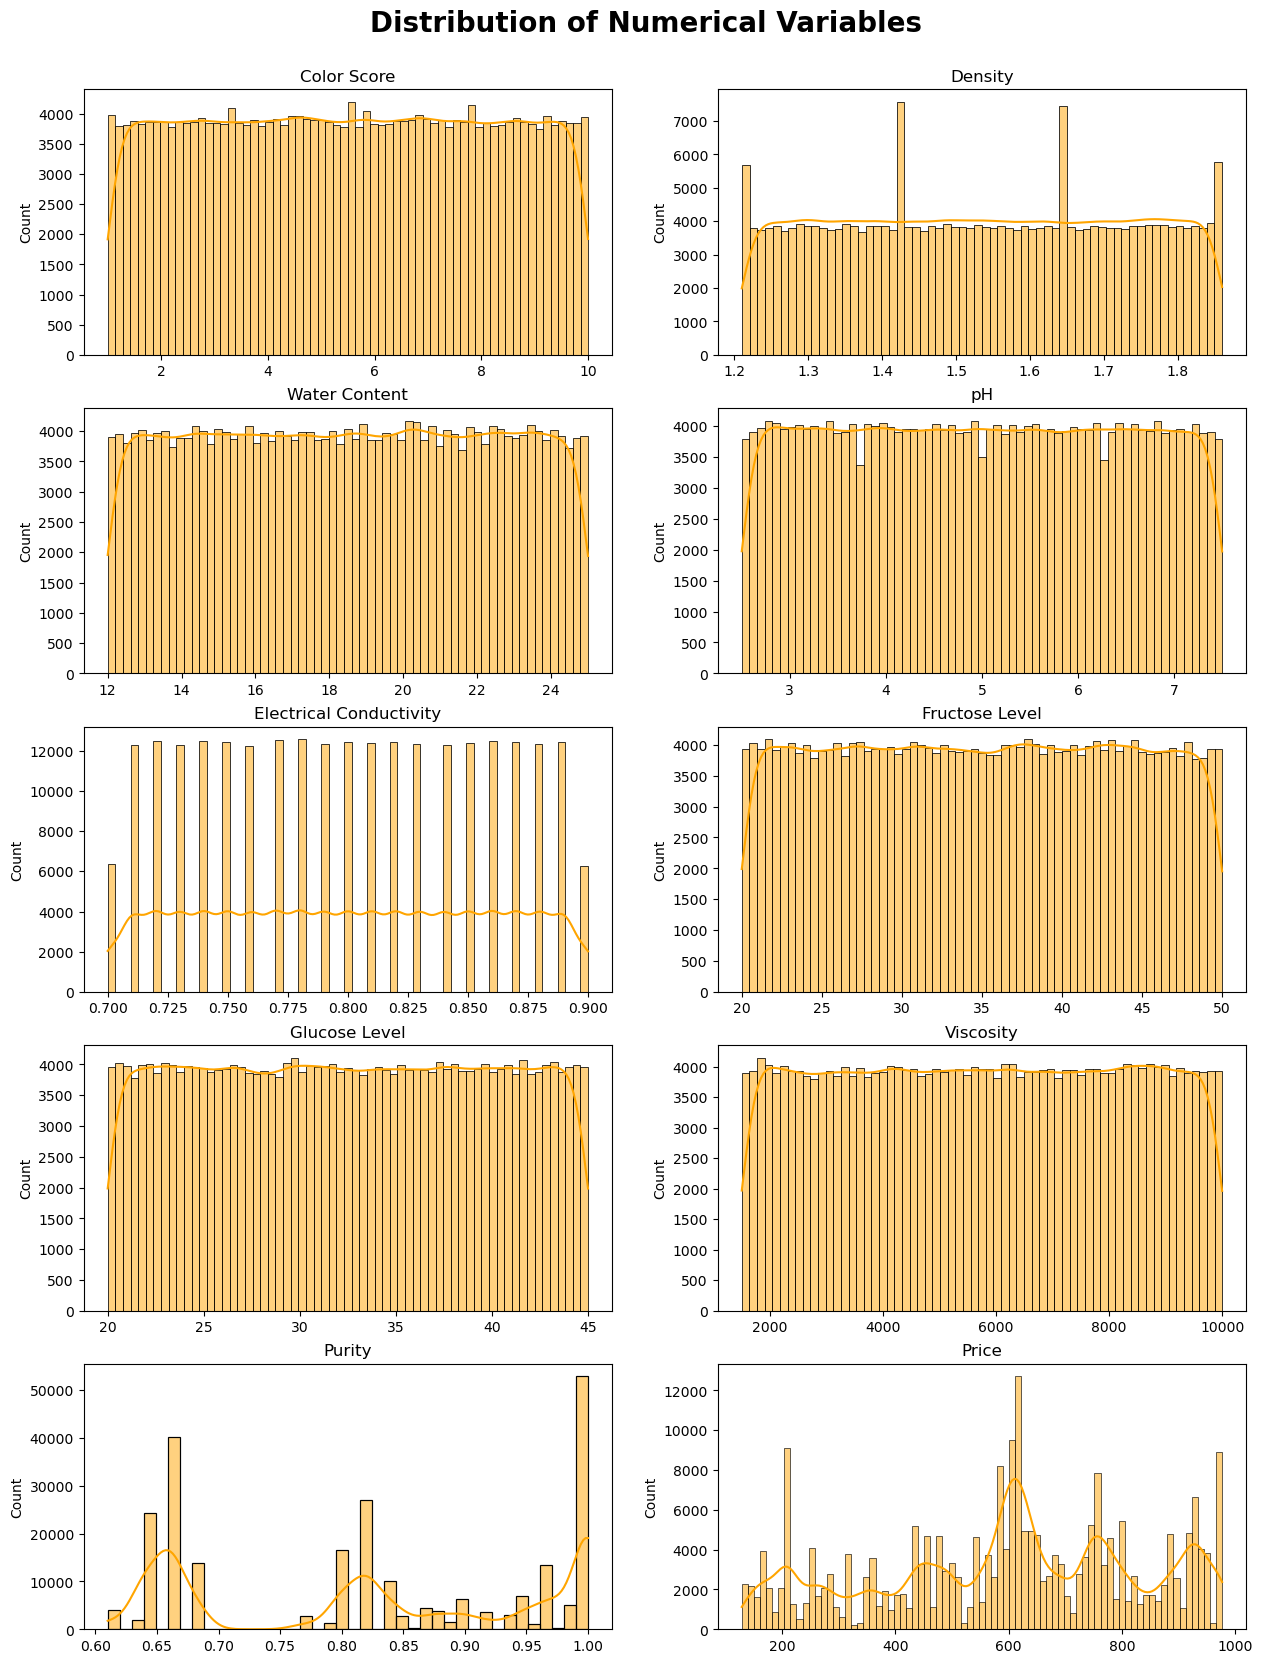

In [12]:
#Histogram - Distribution of numerical variables
plt.figure(figsize = (15, 20))

index = 1
for variable in (numerical_variables):
    plt.subplot(5, 2, index)
    sns.histplot(x = df[variable], kde=True, color='Orange')
    plt.title(variable)
    index += 1
    plt.xlabel('')

plt.suptitle('Distribution of Numerical Variables', size=20, weight='bold', y=0.92)
plt.show()

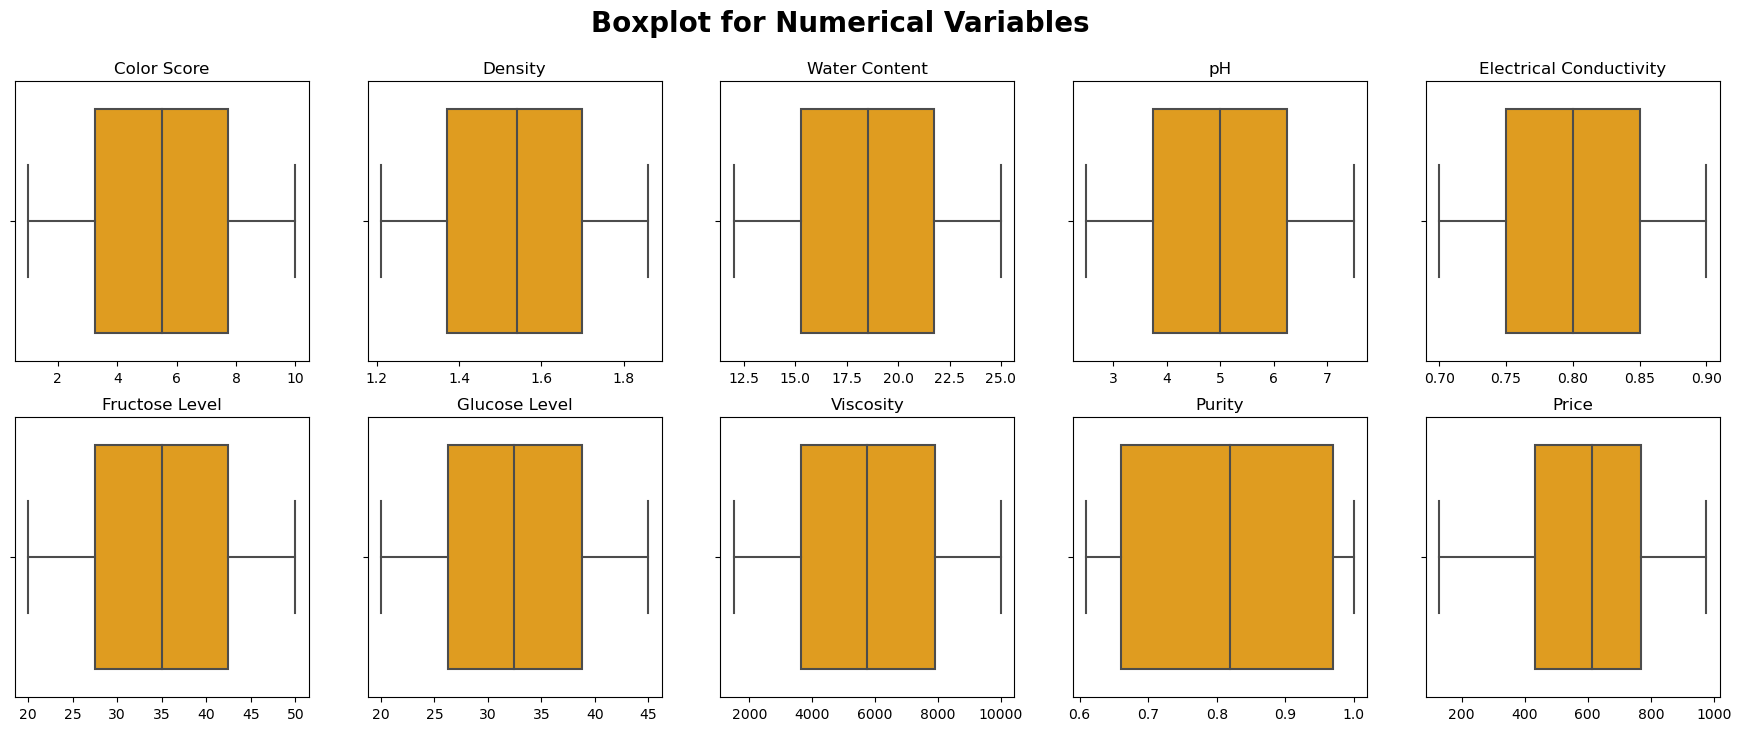

In [107]:
#Barplot - Outlier detection
plt.figure(figsize = (22, 8))

index = 1
for  variable in (numerical_variables):
    plt.subplot(2, 5, index)
    sns.boxplot(x = df[variable], color='orange')
    plt.title(variable)
    index += 1
    plt.xlabel('')

plt.suptitle('Boxplot for Numerical Variables', size=20, weight='bold', y=0.97)
plt.show()

In [14]:
df['Pollen Analysis'].unique()

array(['Blueberry', 'Alfalfa', 'Chestnut', 'Borage', 'Sunflower',
       'Orange Blossom', 'Acacia', 'Tupelo', 'Clover', 'Wildflower',
       'Thyme', 'Sage', 'Avocado', 'Lavender', 'Eucalyptus', 'Buckwheat',
       'Rosemary', 'Heather', 'Manuka'], dtype=object)

In [15]:
for value in categorical_variables:
    print(df[value].value_counts())

Eucalyptus        13194
Avocado           13191
Heather           13187
Thyme             13156
Sunflower         13148
Sage              13117
Blueberry         13106
Lavender          13086
Alfalfa           13049
Buckwheat         13036
Chestnut          13020
Wildflower        13016
Manuka            13003
Borage            13000
Orange Blossom    12992
Acacia            12976
Rosemary          12930
Clover            12910
Tupelo            12786
Name: Pollen Analysis, dtype: int64


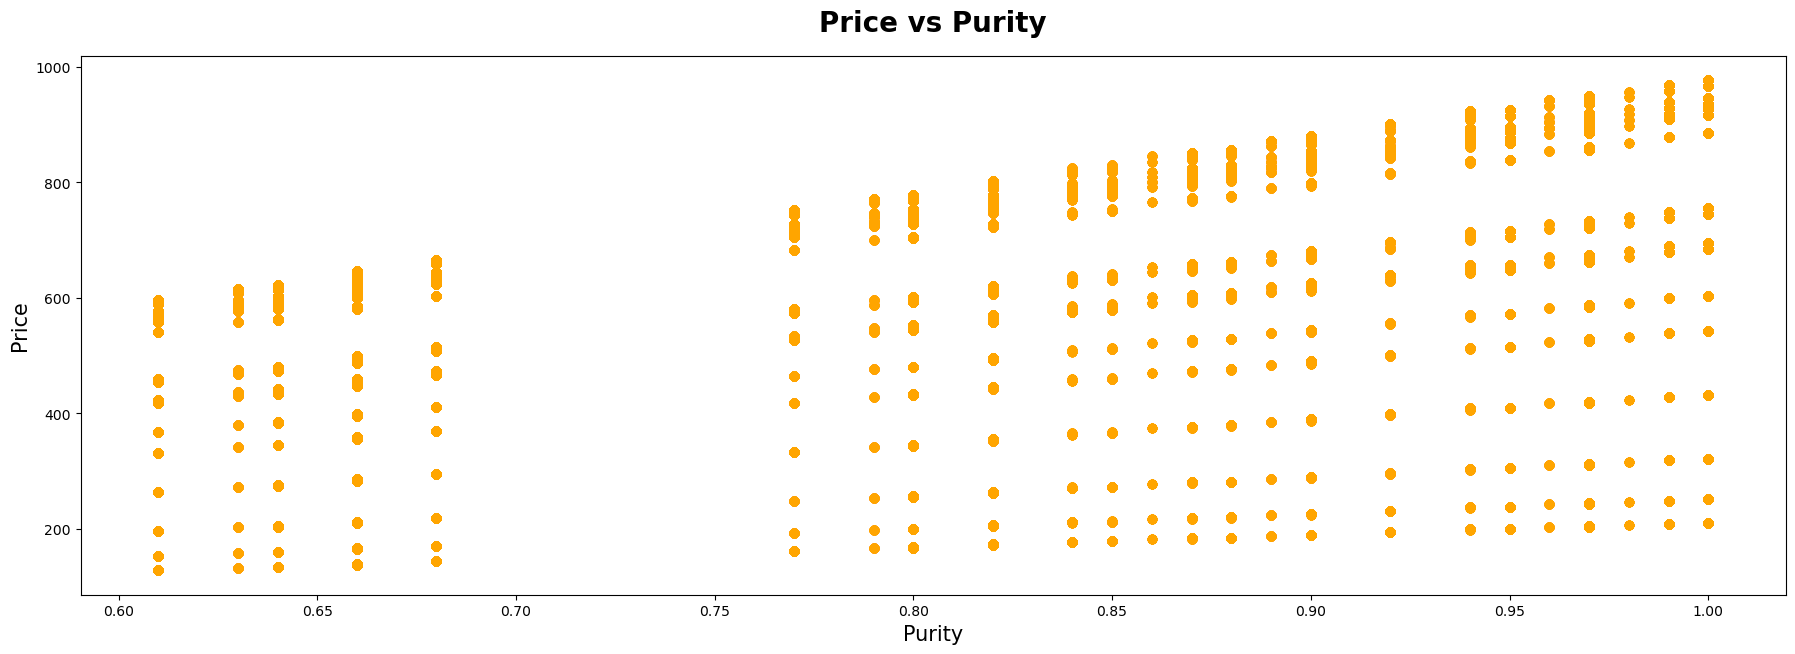

In [15]:
#Scatterplot - Relationship between Price and Purity 
plt.figure(figsize=(22, 7))

plt.scatter(x = df['Purity'], y = df['Price'], color='orange')
plt.title('Price vs Purity', size=20, weight='bold', y=1.03)
plt.xlabel('Purity', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

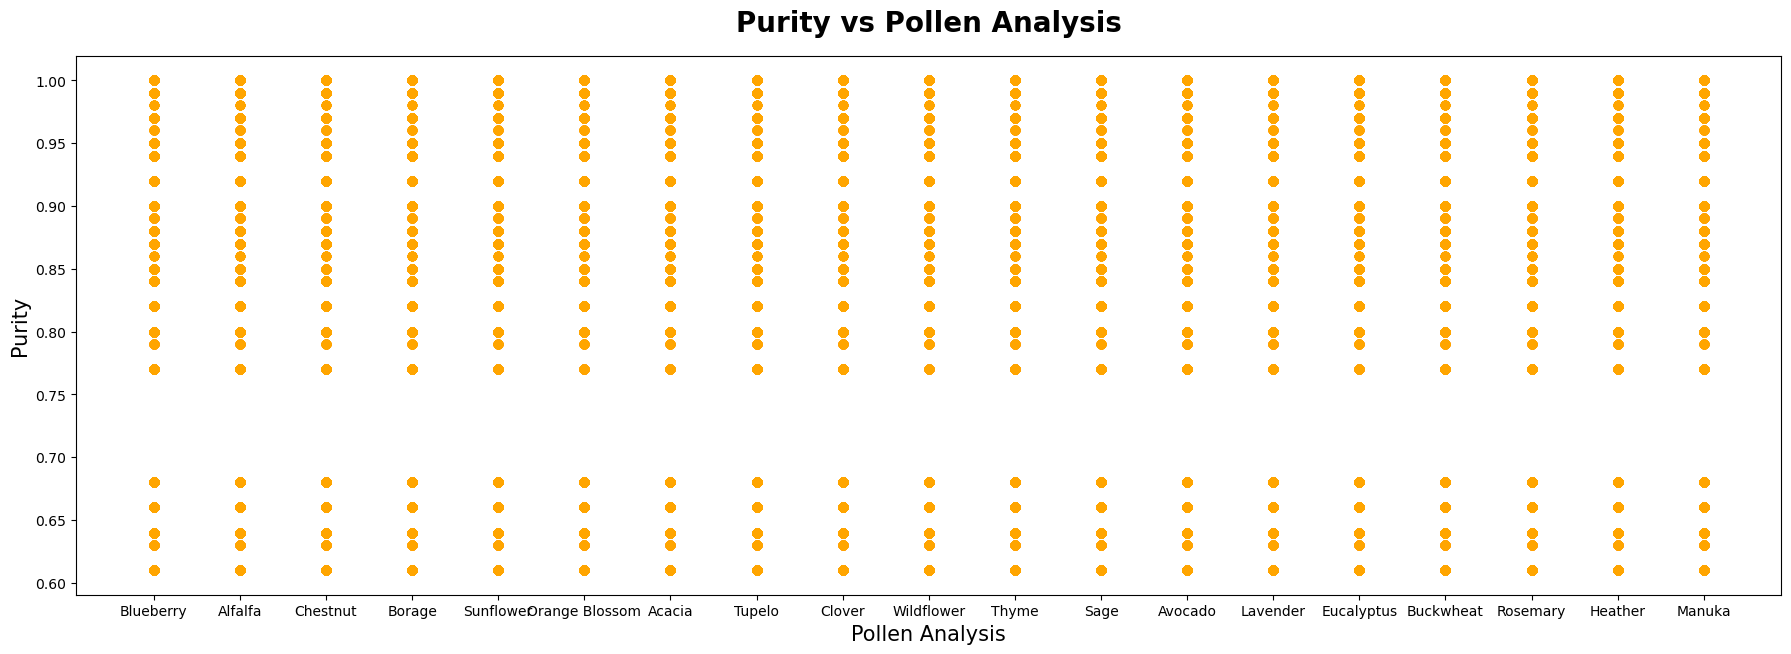

In [16]:
#Scatterplot - Relationship between Purity and Pollen Anlaysis 
plt.figure(figsize=(22, 7))

plt.scatter(x = df['Pollen Analysis'], y = df['Purity'], color='orange')
plt.title('Purity vs Pollen Analysis', size=20, weight='bold', y=1.03)
plt.xlabel('Pollen Analysis', fontsize=15)
plt.ylabel('Purity', fontsize=15)
plt.show()

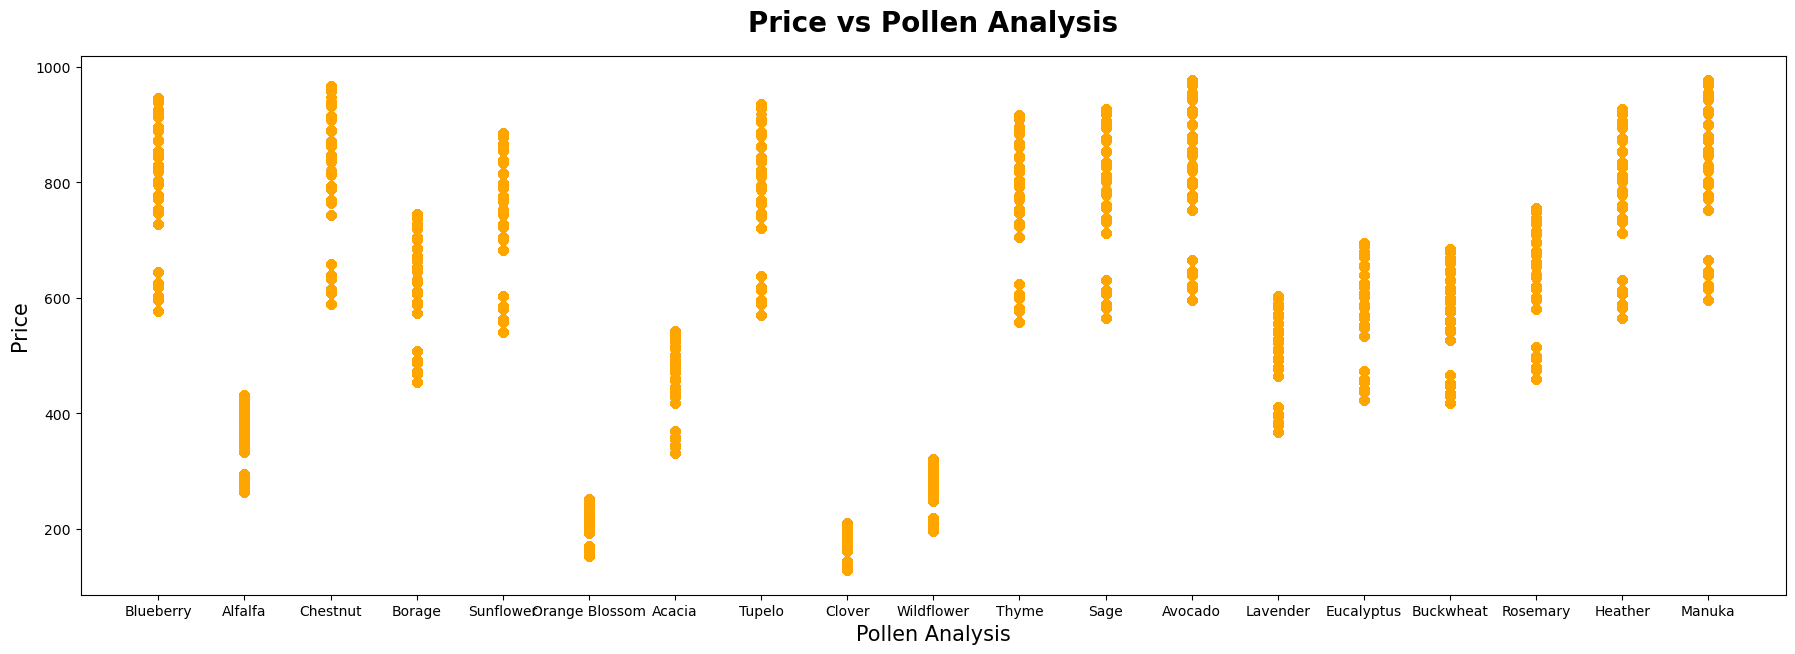

In [17]:
#Scatterplot - Relationship between Price and Pollen Anlaysis 
plt.figure(figsize=(22, 7))

plt.scatter(x = df['Pollen Analysis'], y = df['Price'], color='orange')
plt.title('Price vs Pollen Analysis', size=20, weight='bold', y=1.03)
plt.xlabel('Pollen Analysis', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

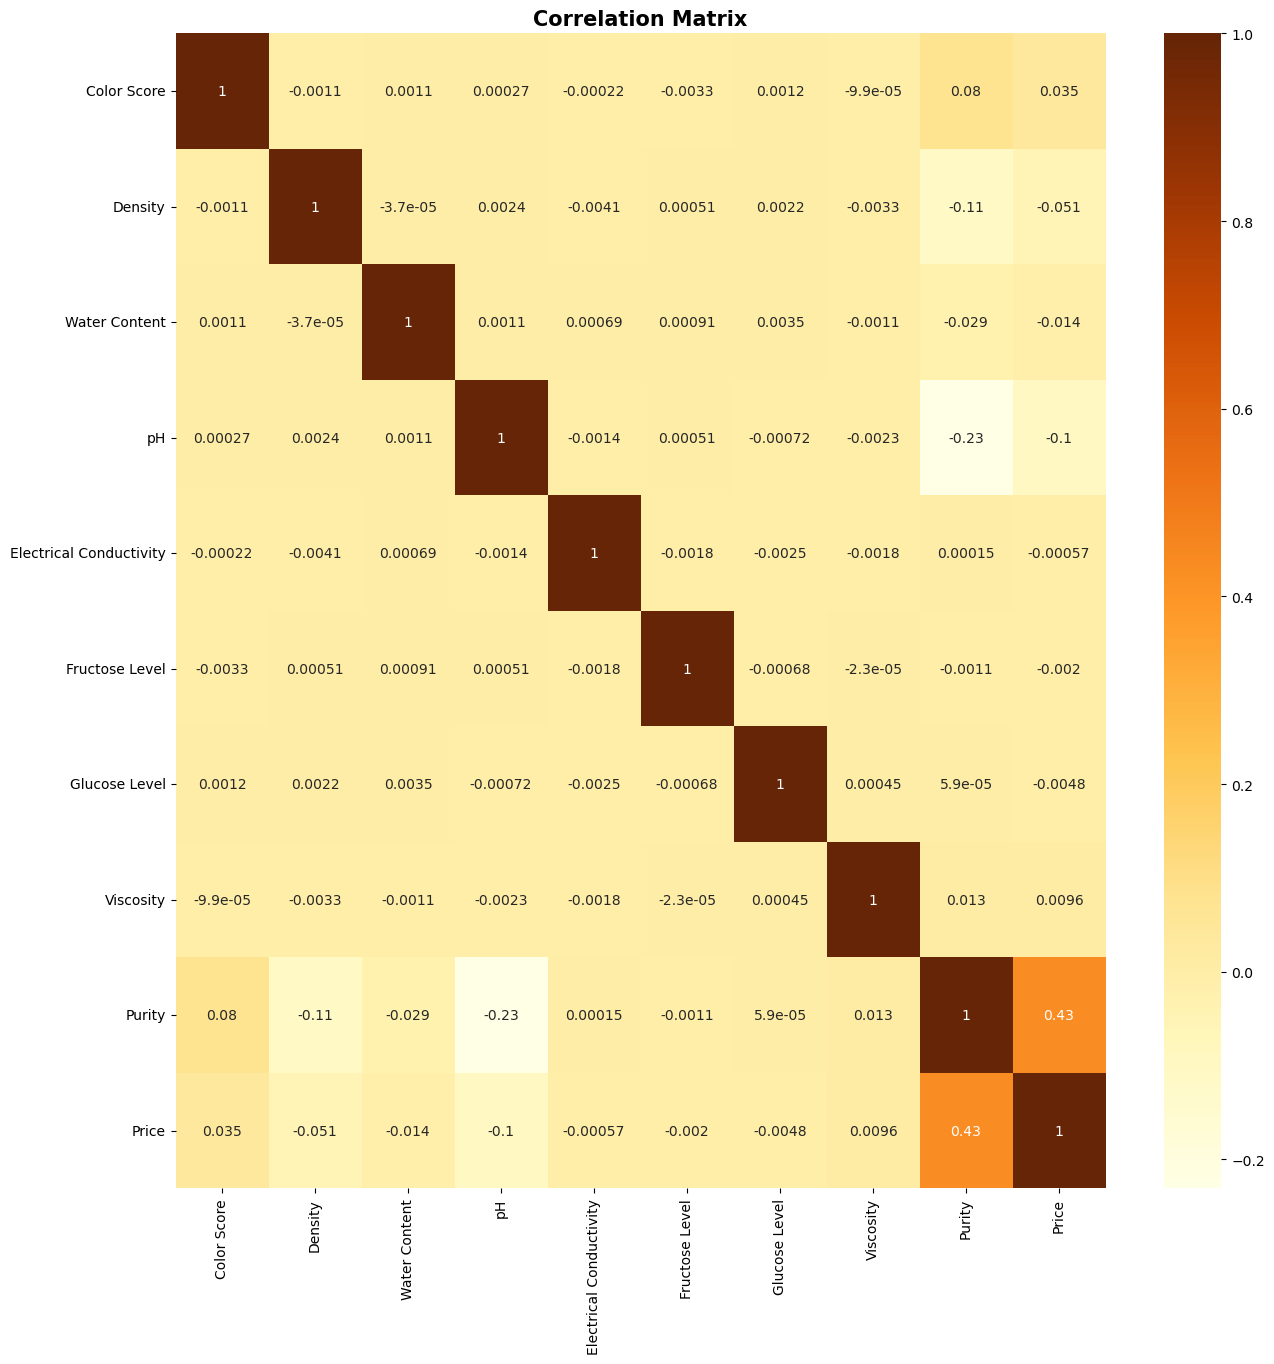

In [142]:
# Correlation matrix - Relationship between numerical features
plt.figure(figsize=(15, 15))

correlation_matrix = df[numerical_variables].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr')
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

In [143]:
correlation_score_price = correlation_matrix['Price'].sort_values(ascending=False)
print('Correlation score for Price')
print('-'*35)
print(correlation_score_price)

Correlation score for Purity
-----------------------------------
Purity                     1.000000
Price                      0.432581
Color Score                0.079770
Viscosity                  0.012572
Electrical Conductivity    0.000151
Glucose Level              0.000059
Fructose Level            -0.001149
Water Content             -0.028894
Density                   -0.108834
pH                        -0.230855
Name: Purity, dtype: float64 


Correlation score for Price
-----------------------------------
Price                      1.000000
Purity                     0.432581
Color Score                0.035166
Viscosity                  0.009632
Electrical Conductivity   -0.000571
Fructose Level            -0.002041
Glucose Level             -0.004815
Water Content             -0.014381
Density                   -0.050518
pH                        -0.100714
Name: Price, dtype: float64


### *Machine Learning Models*

In [11]:
#Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

In [12]:
#Preprocess the data
def preprocess_data(df):
    df_copy = df.copy()
    df_copy = df_copy.drop(['Electrical Conductivity', 'Glucose Level', 'Fructose Level'], axis=1)
    
    # One hot Encoding
    one_hot_encoded_df = pd.get_dummies(df_copy['Pollen Analysis'], prefix='Pollen_Analysis')
    df_copy = pd.concat([df_copy, one_hot_encoded_df], axis=1)
    df_copy.drop('Pollen Analysis', axis=1, inplace=True)

    # Normalization
    scaler = MinMaxScaler()
    df_copy[df_copy.columns] = scaler.fit_transform(df_copy[df_copy.columns])
    return df_copy

In [13]:
#Cross-validation and evaluation
def evaluate_model(model, name, X_train, y_train, X_test, y_test):
    print(f"Evaluating {name}...")
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = [math.sqrt(-score) for score in scores]
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    mae_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    
    #Training on the training set
    model.fit(X_train, y_train)
    
    #Predicting on the test set
    y_pred = model.predict(X_test)
    
    # Compute test set metrics
    test_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)
    test_mae = mean_absolute_error(y_test, y_pred)
    
    return [name, np.mean(rmse_scores), np.mean(r2_scores), np.mean(mae_scores), test_rmse, test_r2, test_mae]

In [14]:
df_preprocessed = preprocess_data(df)
X = df_preprocessed.drop(['Price'], axis=1)
y = df_preprocessed['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = [
    ('Linear Regression', LinearRegression()),
    ('Support Vector Regression', SVR()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42))
]

results = []

for name, model in models:
    result = evaluate_model(model, name, X_train, y_train, X_test, y_test)
    results.append(result)

print('')
print('-'*30)
print('Evaluation complete!')

Evaluating Linear Regression...
Evaluating svr...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating XGBoost...

------------------------------
Evaluation complete!


In [15]:
results_df = pd.DataFrame(results, columns=['Model', 'CV RMSE', 'CV R-squared', 'CV MAE', 'Test RMSE', 'Test R-squared', 'Test MAE'])
results_df

,Model,CV RMSE,CV R-squared,CV MAE,Test RMSE,Test R-squared,Test MAE
0,Linear Regression,0.041640,0.977174,0.030911,0.041754,0.976964,0.030936
1,svr,0.046231,0.971862,0.038114,0.045683,0.972424,0.037621
2,Random Forest,0.001236,0.999980,0.000597,0.001234,0.999980,0.000598
3,Gradient Boosting,0.030137,0.988042,0.026994,0.029656,0.988379,0.026474
4,XGBoost,0.001301,0.999978,0.000813,0.001314,0.999977,0.000830


In [ ]:
# Function to cross-validate
def evaluate_model(model, name, X_train, y_train, X_test, y_test):
    print(f"Evaluating {name}...")
    
    # Cross-validation
    cv_scores = cross_validate(model, X_train, y_train, cv=5,
                               scoring=['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error'],
                               return_train_score=False)
    
    cv_rmse_scores = [math.sqrt(-score) for score in cv_scores['test_neg_mean_squared_error']]
    cv_r2_scores = cv_scores['test_r2']
    cv_mae_scores = [-score for score in cv_scores['test_neg_mean_absolute_error']]
    
    # Training on the entire training set
    model.fit(X_train, y_train)
    # Predicting on the test set
    y_pred_test = model.predict(X_test)
    # Compute test set metrics
    test_rmse = math.sqrt(mean_squared_error(y_test, y_pred_test))
    test_r2 = r2_score(y_test, y_pred_test)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    return [name, cv_rmse_scores, cv_r2_scores, cv_mae_scores, test_rmse, test_r2, test_mae]

In [ ]:
df_preprocessed = preprocess_data(df)
X = df_preprocessed.drop(['Price'], axis=1)
y = df_preprocessed['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = [
    ('Linear Regression', LinearRegression()),
    ('svr', SVR()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42))
]

results = []

for name, model in models:
    result = evaluate_model(model, name, X_train, y_train, X_test, y_test)
    results.append(result)

print('')
print('-'*30)
print('Evaluation complete!')

In [ ]:
results_df = pd.DataFrame(results, columns=['Model', 'CV RMSE', 'CV R-squared', 'CV MAE', 'Test RMSE', 'Test R-squared', 'Test MAE'])
results_df[['CV RMSE', 'CV R-squared', 'CV MAE']] = results_df[['CV RMSE', 'CV R-squared', 'CV MAE']].applymap(np.mean)
results_df

In [19]:
# Random Forest
random_forest1 = RandomForestRegressor(random_state=42)
random_forest1.fit(X_train, y_train)
y_pred_rf = random_forest1.predict(X_test)

test_rmse_rf = math.sqrt(mean_squared_error(y_test, y_pred_rf))
test_r2_rf = r2_score(y_test, y_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_pred_rf)

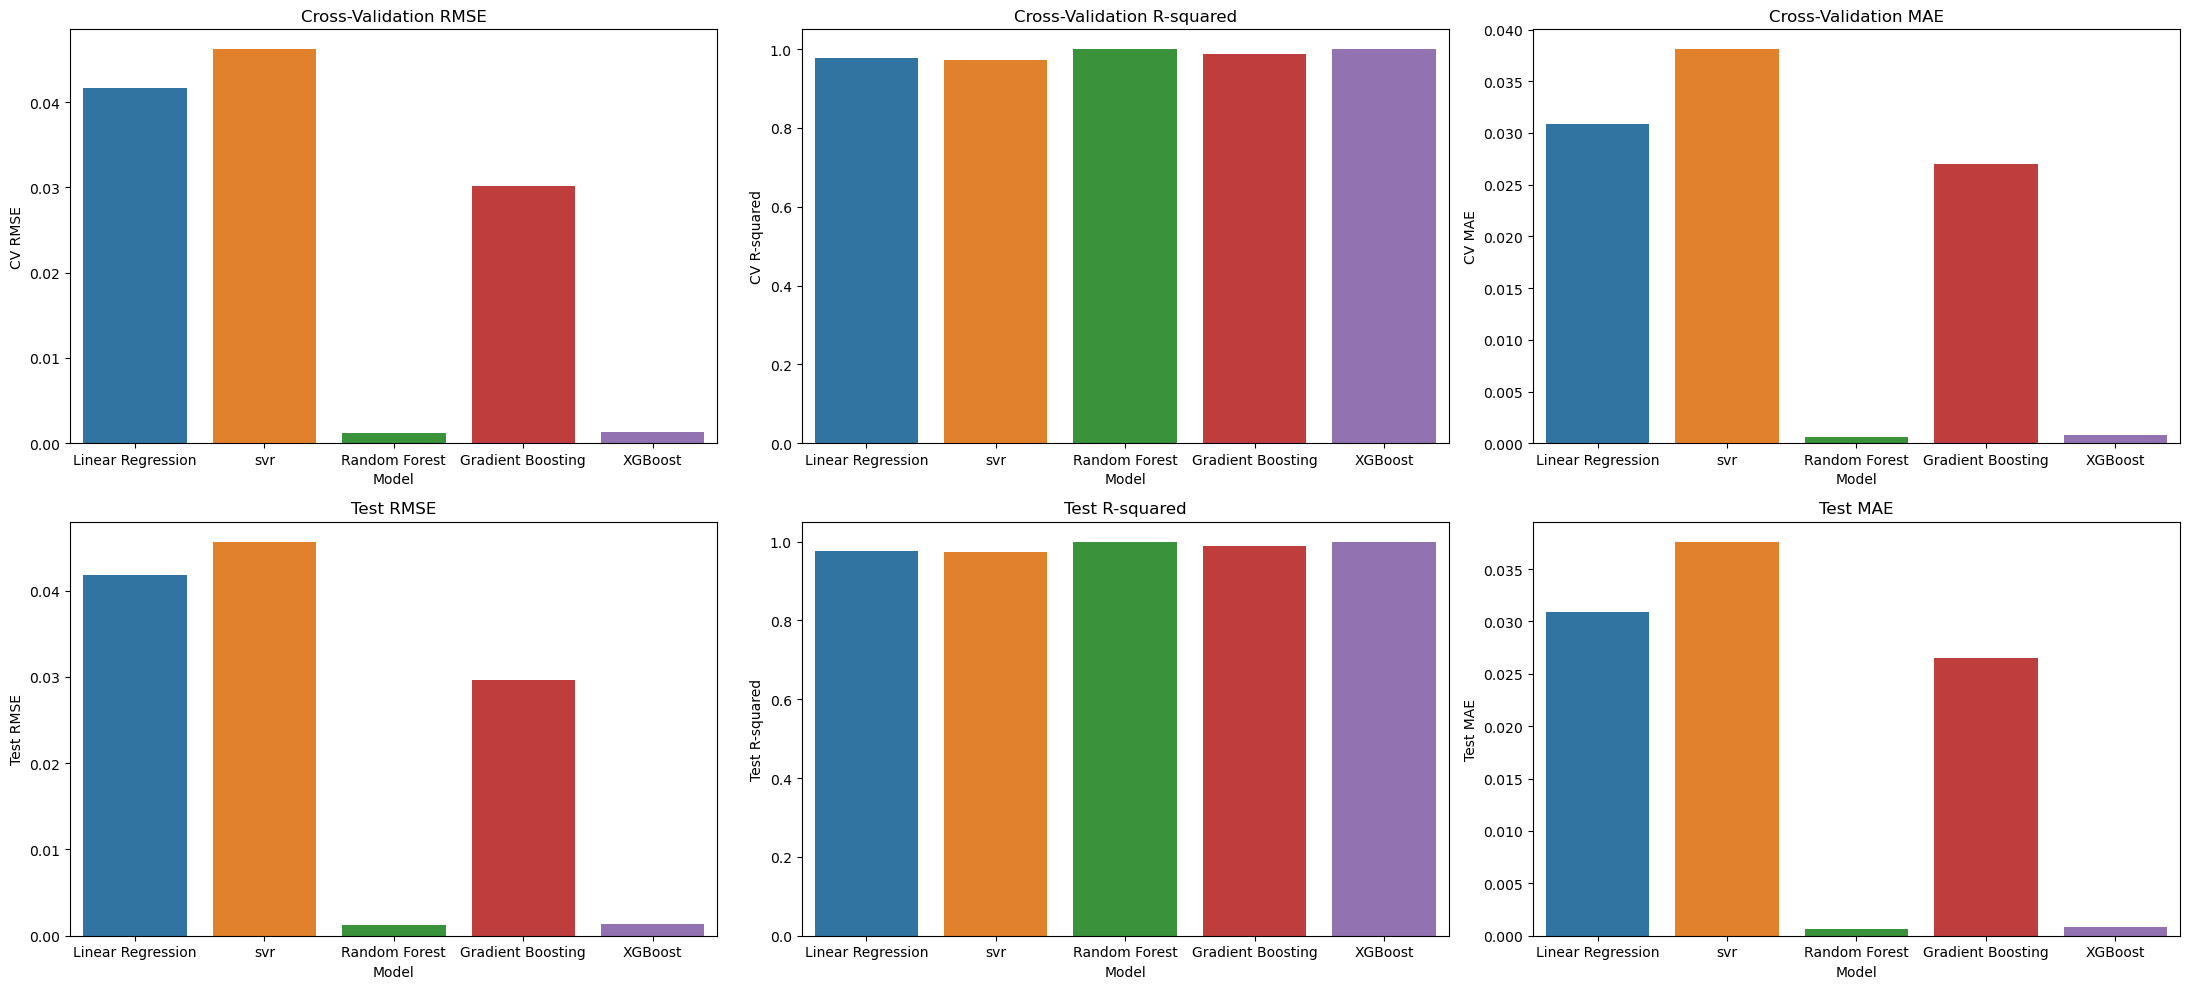

In [29]:
# Plotting function
def plot_model_performance(results_df):
    # Initialize the plot
    plt.figure(figsize=(22, 10))

    # Plot RMSE
    plt.subplot(2, 3, 1)
    sns.barplot(x='Model', y='CV RMSE', data=results_df)
    plt.title('Cross-Validation RMSE')

    # Plot R-squared
    plt.subplot(2, 3, 2)
    sns.barplot(x='Model', y='CV R-squared', data=results_df)
    plt.title('Cross-Validation R-squared')

    # Plot MAE
    plt.subplot(2, 3, 3)
    sns.barplot(x='Model', y='CV MAE', data=results_df)
    plt.title('Cross-Validation MAE')

    # Plot Test RMSE
    plt.subplot(2, 3, 4)
    sns.barplot(x='Model', y='Test RMSE', data=results_df)
    plt.title('Test RMSE')
    
    # Plot Test RMSE
    plt.subplot(2, 3, 5)
    sns.barplot(x='Model', y='Test R-squared', data=results_df)
    plt.title('Test R-squared')
    
    # Plot MAE
    plt.subplot(2, 3, 6)
    sns.barplot(x='Model', y='Test MAE', data=results_df)
    plt.title('Test MAE')
    
    plt.tight_layout()
    plt.show()

plot_model_performance(results_df)

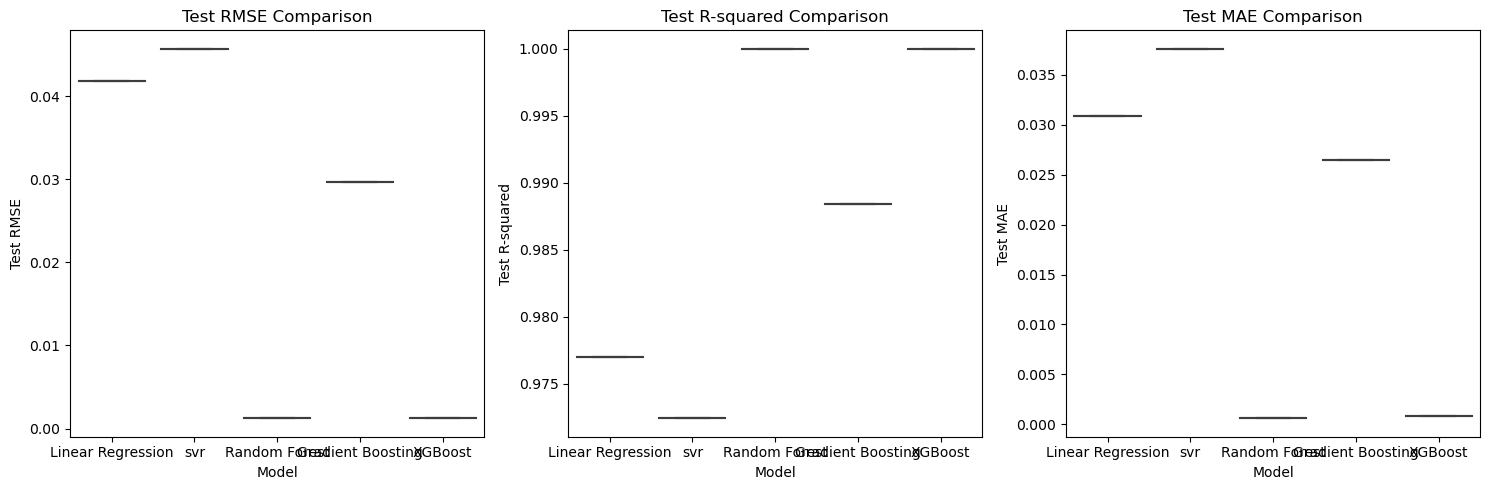

In [41]:
# Initialize the plot
plt.figure(figsize=(15, 5))

# Create box plots for Test RMSE
plt.subplot(1, 3, 1)
sns.boxplot(x='Model', y='Test RMSE', data=results_df)
plt.title('Test RMSE Comparison')

# Create box plots for Test R-squared
plt.subplot(1, 3, 2)
sns.boxplot(x='Model', y='Test R-squared', data=results_df)
plt.title('Test R-squared Comparison')

# Create box plots for Test MAE
plt.subplot(1, 3, 3)
sns.boxplot(x='Model', y='Test MAE', data=results_df)
plt.title('Test MAE Comparison')

plt.tight_layout()
plt.show()


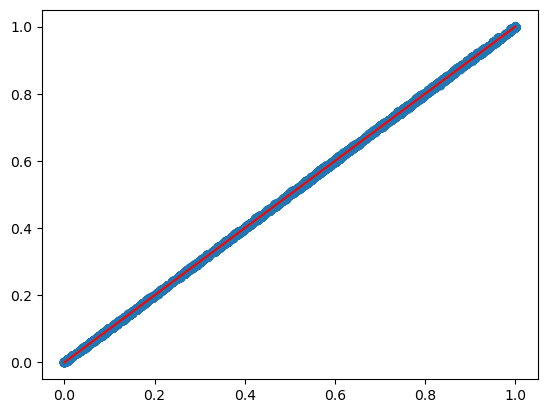

In [71]:
plt.scatter(y_test, y_pred_xgb, alpha=0.2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns

# Train XGBoost model on the entire training set
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

ValueError: x and y must be the same size

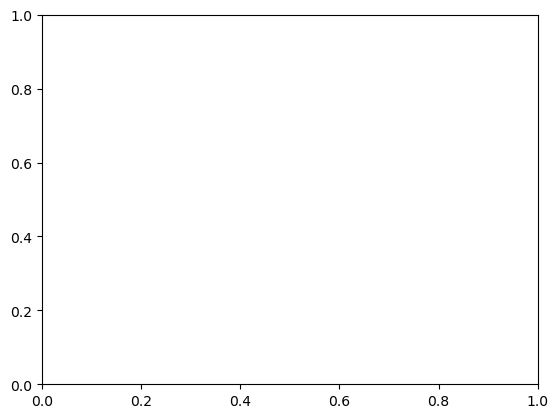

In [61]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred_xgb, color='blue', linewidth=3)
plt.show()

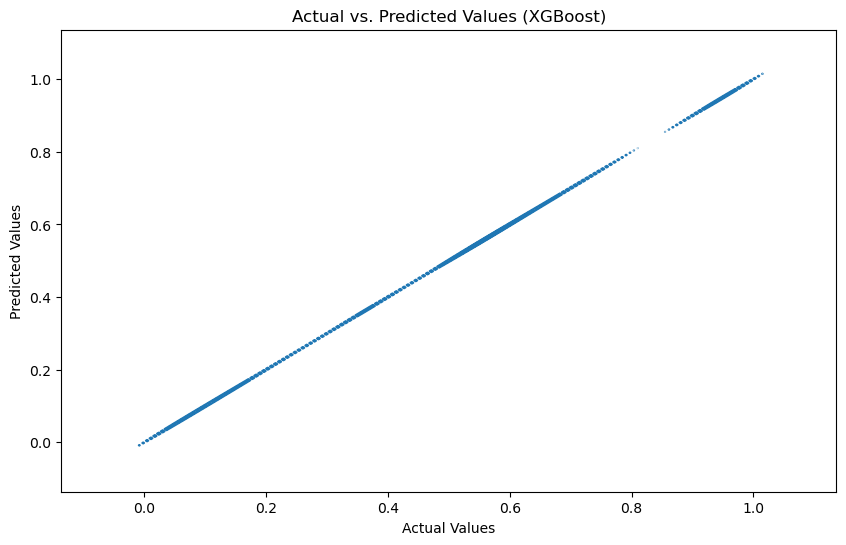

In [46]:
# Create a DataFrame for actual and predicted values
results_xgb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})

# Initialize the plot
plt.figure(figsize=(10, 6))

# Plot KDE for actual vs. predicted values
sns.kdeplot(data=results_xgb, x='Actual', y='Predicted')

# Set plot title and labels
plt.title('Actual vs. Predicted Values (XGBoost)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()

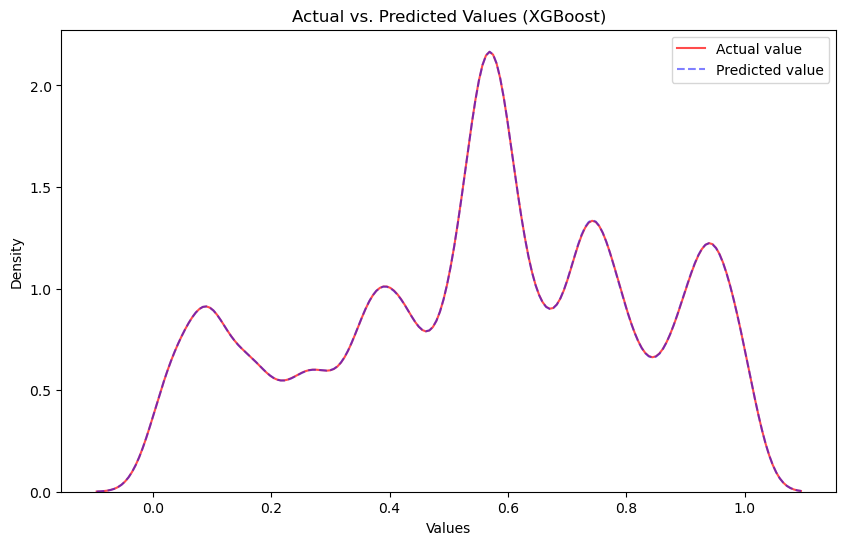

In [56]:
# Initialize the plot
plt.figure(figsize=(10, 6))

# Plot KDE for actual values
sns.kdeplot(results_xgb['Actual'], color='r', label='Actual value', alpha=0.7)

# Plot KDE for predicted values
sns.kdeplot(results_xgb['Predicted'], color='b', label='Predicted value', alpha=0.5, linestyle='--')

# Set plot title and labels
plt.title('Actual vs. Predicted Values (XGBoost)')
plt.xlabel('Values')
plt.ylabel('Density')

# Add legend
plt.legend()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


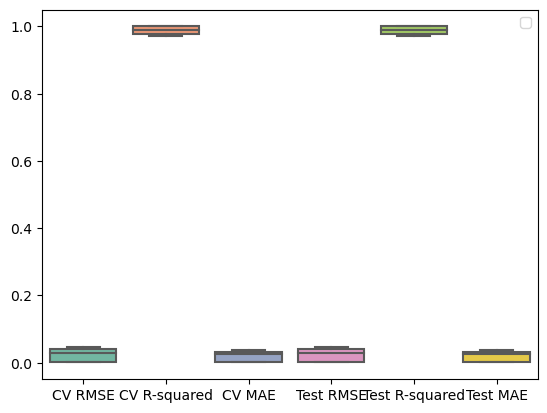

In [58]:
sns.boxplot(results_df, palette = 'Set2')
plt.legend()
plt.show()

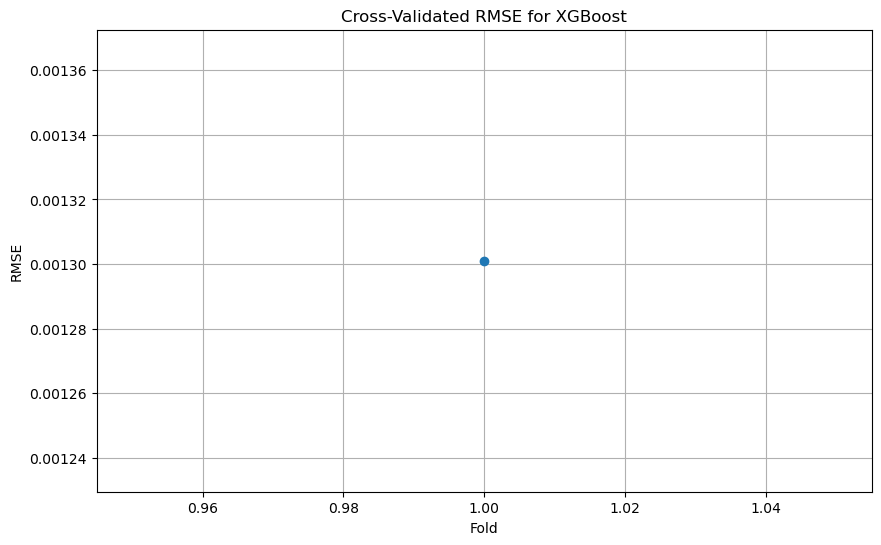

In [35]:
# Extract cross-validated RMSE scores for XGBoost
xgboost_cv_rmse = results_df.loc[results_df['Model'] == 'XGBoost', 'CV RMSE'].values

# Initialize the plot
plt.figure(figsize=(10, 6))

# Plot cross-validated RMSE for each fold
plt.plot(range(1, len(xgboost_cv_rmse) + 1), xgboost_cv_rmse, marker='o')

# Set plot title and labels
plt.title('Cross-Validated RMSE for XGBoost')
plt.xlabel('Fold')
plt.ylabel('RMSE')

plt.grid(True)
plt.show()


In [59]:
import timeit

# Function to cross-validate
def evaluate_model(model, name, X_train, y_train, X_test, y_test):
    print(f"Evaluating {name}...")
    
    # Training time measurement
    start_training = timeit.default_timer()
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = [math.sqrt(-score) for score in scores]
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    mae_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    end_training = timeit.default_timer()
    
    # Testing time measurement
    start_testing = timeit.default_timer()
    model.fit(X_train, y_train)
    end_testing = timeit.default_timer()
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Compute test set metrics
    test_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)
    test_mae = mean_absolute_error(y_test, y_pred)
    
    print('')
    print('-'*25)
    print('Evaluation complete!')
    
    training_time = end_training - start_training
    testing_time = end_testing - start_testing
    
    return [name, np.mean(rmse_scores), np.mean(r2_scores), np.mean(mae_scores), test_rmse, test_r2, test_mae, training_time, testing_time]

# Instead of executing the loop, create a dictionary of models and functions
models_dict = {
    'Linear Regression': LinearRegression(),
    'svr': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Loop through the dictionary to evaluate each model and measure time
results = []
for name, model in models_dict.items():
    result = evaluate_model(model, name, X_train, y_train, X_test, y_test)
    results.append(result)

results_df = pd.DataFrame(results, columns=['Model', 'CV RMSE', 'CV R-squared', 'CV MAE', 'Test RMSE', 'Test R-squared', 'Test MAE', 'Training Time', 'Testing Time'])
results_df


Evaluating Linear Regression...

-------------------------
Evaluation complete!
Evaluating svr...

-------------------------
Evaluation complete!
Evaluating Random Forest...

-------------------------
Evaluation complete!
Evaluating Gradient Boosting...

-------------------------
Evaluation complete!
Evaluating XGBoost...

-------------------------
Evaluation complete!


,Model,CV RMSE,CV R-squared,CV MAE,Test RMSE,Test R-squared,Test MAE,Training Time,Testing Time
0,Linear Regression,0.041640,0.977174,0.030911,0.041754,0.976964,0.030936,2.838453,0.165859
1,svr,0.046231,0.971862,0.038114,0.045683,0.972424,0.037621,130.840878,8.014176
2,Random Forest,0.001236,0.999980,0.000597,0.001234,0.999980,0.000598,2621.365073,221.815445
3,Gradient Boosting,0.030137,0.988042,0.026994,0.029656,0.988379,0.026474,648.700085,56.123647
4,XGBoost,0.001301,0.999978,0.000813,0.001314,0.999977,0.000830,19.227646,1.390191


ValueError: x and y must be the same size

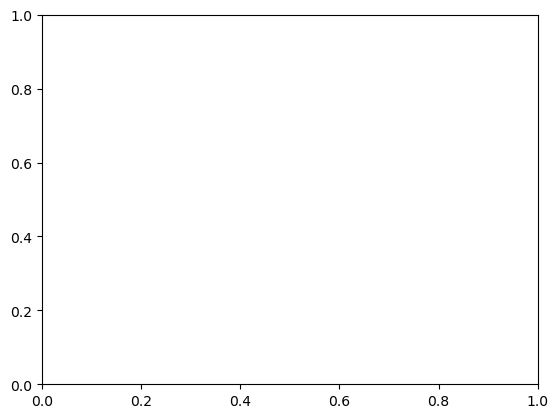

In [60]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()